In [3]:
import os
import sys
import re

from PIL import Image

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import seaborn as sns

import math
import random

from scipy.stats import pearsonr

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from CSE6240_utilities import plot_confusion_matrix
import matplotlib.pylab as pylab

## a. RGB

### Process the data and save the processed data

In [12]:
def readImg_RGB_Hist(folder, images, image_names, category, i = 0):
    ''' For reading images as RGB histogram and row combining them as matrix images
    also records the labels of images as image_names
    
    @folder: the name of folder that containing images, should be under the working directory
    @images: list that stores the images
    @image_names: list that stores the labels of images
    @category: category of image
    '''
    
    for base, dirs, files in os.walk ('./' + folder + '/'):
        for filename in files:
            name_JPEG = re.match (r'^(.*)\.JPEG$', filename)
            if name_JPEG:
                filepath = os.path.join (base, filename)
                image = Image.open (filepath, 'r').histogram()
                image = np.array(image).reshape(-1)
                if image.shape[0] == 768:
                    images.append(image)
                    image_names.append(category)
                    if i >= 999:
                        break
                    else:
                        i += 1
                else:
                    pass
    return images, image_names

In [13]:
images = []
image_names = []

images, image_names = readImg_RGB_Hist("01-Animal", images, image_names, 0)
images, image_names = readImg_RGB_Hist("02-Fungus", images, image_names, 1)
images, image_names = readImg_RGB_Hist("03-Geological Formation", images, image_names, 2)
images, image_names = readImg_RGB_Hist("04-Person", images, image_names, 3)
images, image_names = readImg_RGB_Hist("05-Plant, flora, plant life", images, image_names, 4)
images, image_names = readImg_RGB_Hist("06-Sport", images, image_names, 5)

In [5]:
np.savetxt("Histogram-RGB.csv", np.array(images), delimiter = ",")
np.savetxt("Histogram-RGB-label.csv", np.array(image_names), delimiter = ",")

### Read the processed data

In [4]:
X = pd.read_csv("Histogram-RGB.csv", header = None).values
y = pd.read_csv("Histogram-RGB-label.csv", header = None).values.reshape(-1)

In [5]:
X.shape

(6000, 768)

### Euclidean-based KNN

In [6]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf.fit(X, y)

y_pred = clf.predict(X)

In [7]:
## Confusion Matrix - euclidean
cm = confusion_matrix(y, y_pred)
print(cm)

[[561 196  60  61  83  39]
 [100 773  31  33  48  15]
 [154 163 548  52  45  38]
 [124 241  70 487  51  27]
 [ 97 216  63  49 563  12]
 [185 162 115  70  60 408]]


== RGB histogram | euclidean ==
accuracy = 0.5567


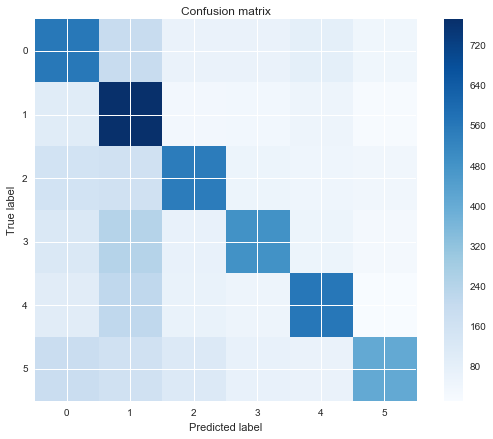

In [9]:
## Visualize the confusion matrix
pylab.rcParams['figure.figsize'] = 8, 6

print "== RGB histogram | euclidean =="
plot_confusion_matrix(cm)

print "accuracy = %.4f" % (1.0 * np.sum(np.diag(cm)) / np.sum(np.sum(cm, axis = 0)))

In [ ]:
# def pearson(x, y):
#      return (1 - pearsonr(x, y)[0])

# clf = KNeighborsClassifier(n_neighbors = 5, metric = pearson)
# clf.fit(X, y)

# y_pred = clf.predict(X)

# ## pearson
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y, y_pred)
# print(cm)

# pylab.rcParams['figure.figsize'] = 8, 6
# print "== RGB histogram | pearson =="
# plot_confusion_matrix(cm)

## b. HSV

### Process the data and save the processed data

In [ ]:
import cv2

def readImg_HSV_Hist(folder, images, image_names, category, i = 0):
    ''' For reading images as HSV histogram and row combining them as matrix images
    also records the labels of images as image_names
    
    @folder: the name of folder that containing images, should be under the working directory
    @images: list that stores the images
    @image_names: list that stores the labels of images
    @category of image
    '''
    
    for base, dirs, files in os.walk ('./' + folder + '/'):
        for filename in files:
            name_JPEG = re.match (r'^(.*)\.JPEG$', filename)
            if name_JPEG:
                filepath = os.path.join (base, filename)
                image = cv2.imread (filepath)
                hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
                hist = cv2.calcHist([hsv], [0], None, [180], [0, 180]).transpose()
                hist = np.concatenate((hist, cv2.calcHist([hsv], [1], None, [180], [0, 180]).transpose()), axis = 0)
                hist = np.concatenate((hist, cv2.calcHist([hsv], [2], None, [180], [0, 180]).transpose()), axis = 0)
                hist = hist.reshape(-1)
                image = hist
                if image.shape[0] == 540:
                    images.append(image)
                    image_names.append(0)
                    if i >= 999:
                        break
                    else:
                        i += 1
                else:
                    pass

    return images, image_names

In [61]:
images = []
image_names = []

images, image_names = readImg_HSV_Hist("01-Animal", images, image_names, 0)
images, image_names = readImg_HSV_Hist("02-Fungus", images, image_names, 1)
images, image_names = readImg_HSV_Hist("03-Geological Formation", images, image_names, 2)
images, image_names = readImg_HSV_Hist("04-Person", images, image_names, 3)
images, image_names = readImg_HSV_Hist("05-Plant, flora, plant life", images, image_names, 4)
images, image_names = readImg_HSV_Hist("06-Sport", images, image_names, 5)

In [62]:
len(images)

6000

In [63]:
np.savetxt("Histogram-HSV.csv", np.array(images), delimiter = ",")

In [64]:
np.savetxt("Histogram-HSV-label.csv", np.array(image_names), delimiter = ",")

### Read the processed data

In [10]:
X = pd.read_csv("Histogram-HSV.csv", header = None).values
y = pd.read_csv("Histogram-HSV-label.csv", header = None).values.reshape(-1)

### Euclidean-based KNN


In [11]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf.fit(X, y)

y_pred = clf.predict(X)

In [12]:
cm = confusion_matrix(y, y_pred)
print(cm)

[[522 185 104  56  88  45]
 [ 88 779  27  19  59  28]
 [108 172 593  34  27  66]
 [109 232  92 482  37  48]
 [ 79 184  43  26 654  14]
 [119 169  83  59  52 518]]


== HSV histogram | euclidean ==
accuracy = 0.5913


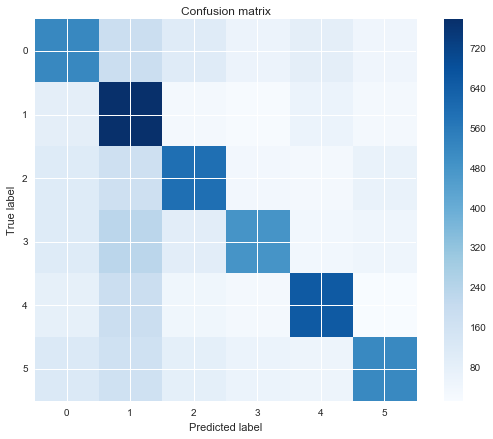

In [13]:
pylab.rcParams['figure.figsize'] = 8, 6  # that's default image size for this interactive session

print "== HSV histogram | euclidean =="
plot_confusion_matrix(cm)
print "accuracy = %.4f" % (1.0 * np.sum(np.diag(cm)) / np.sum(np.sum(cm, axis = 0)))

## Conclusion

We can find that when using **Euclidean distance**, KNN performs similarly between RGB-hist and HSV-hist. I would argue HSV-hist might be better than RGB-hist because it has both higher accuracy (0.5913) and smaller size ($X \in R^{6000 \times 480}$) compared to RGB-hist (0.5567, $X \in R^{6000 \times 768}$).

<img src="embed_pictures/RGB-eu.PNG", width = 200>
$$accuracy = \frac{Tr(cm)}{\sum\sum{cm}} = 0.5567$$
<img src="embed_pictures/HSV-eu.PNG", width = 200>
$$accuracy = \frac{Tr(cm)}{\sum\sum{cm}} = 0.5913$$